In [8]:
import warnings
warnings.filterwarnings("ignore")


#standard ds imports
import numpy as np
import pandas as pd

#stats and plotting
from pydataset import data
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

### Null vs Alternative Hypothesis
- $H_0$: no difference or no effect
- $H_a$: there is a difference or effect
- wether Ha is ≠, <,>, determines one-tailed vs. two-tailed test
    - < or > == one-tailed
    - ≠ == two-tailed
    
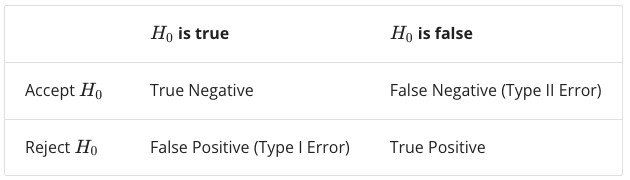

- A **type I** error is when we reject the null hypothesis, but, in reality, the null hypothesis is true.
- A **type II** error is when we fail to reject the null hypothesis when it is actually false.

# Part 1
For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

##### 1. Has the network latency gone up since we switched internet servive providers?

 - $H_0$ : There is no difference in network latency due to a swtich in internet servie providers.
- $H_a$ : The is a difference in network latency due to a switch in internet service providers. 
    
    - True positive: We rejcet the $H_0$, there is a difference between latency and providers.
    - False positive (Type I): We reject the $H_0$, there is a diffence betwen latency and providers, but, in reality, there is no difference (null is true). 
    - True Negative: We fail to reject the $H_0$, there is no difference between latency and providers.
    - False Negative (Type II): We fail to reject the $H_0$, there is no difference between latency and providers, however this is false (there is a difference). 

##### 2. Is the website redesign any good?

- $H_0$: There is no difference between the old and new website design.
- $H_a$: There is a difference between the old and new website design. 
    - True positve: We reject the $H_0$, the designs are different. 
    - False positive (Type I): We reject the $H_0$, the designs are different, but, in reality, there is no difference (null is true). 
    - True negative: We fail to reject the $H_0$, there is no  difference in the website desing.
    - False negative (Type II): We fail to reject the $H_0$, we think the designs are not different, however this is false (they are differnt).

##### 3. Is our television ad driving more sales?

- $H_0$: The ad did not impact sales.
- $H_a$: The ad did impact sales. 
    - True positive: We reject the $H_0$, there is a impact from the ad.
    - False positive(Type I): We reject the $H_0$, there is a impact from the ad, but, in reality, there is no difference(null is true).
    - True negative: We fail to reject the $H_0$, there is no impact from the ad. 
    - False negative (Type II): We fail to reject the $H_0$, there is no impact from the ad, however this is false (there is an impact).

# Part II

Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.
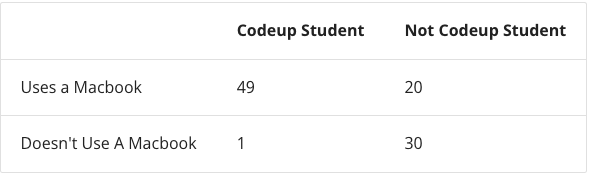

$H_0$: There is no association between being a Codeup Student and using a Macbook. <br>
$H_a$: There is an association between being a Codeup Student and using a Macbook.

In [2]:
#making the table
data = {
    'Codeup_Student': [49, 1],
    'Not_Codeup_Student': [20, 30]
}

df = pd.DataFrame(data, index=['Uses_a_Macbook', "Doesn't_Use_A_Macbook"])

print(df)

                       Codeup_Student  Not_Codeup_Student
Uses_a_Macbook                     49                  20
Doesn't_Use_A_Macbook               1                  30


In [3]:
# prettier table:
observed = [[49,20],[1,30]]
observed = pd.DataFrame(observed, columns = ['codeup_student','not_codeup_student'], index = ['macbook', 'no_macbook'])
observed

,codeup_student,not_codeup_student
macbook,49,20
no_macbook,1,30


In [4]:
chi2, p, defg, expected = stats.chi2_contingency(df)

In [5]:
print(f'''Observed:
{df.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[49 20]
 [ 1 30]]

Expected:
[[34 34]
 [15 15]]
________________

ꭓ² = 36.6526
p  = 1.4116760526193828e-09


In [6]:
alpha = 0.05
if p < alpha:
    print('We reject the null hypothesis, using a macbook and being at codeup are not indepent of each other.')
else:
    print('We fail to reject the null, using a mackbook and being a codeip student are indepent of each other.')

We reject the null hypothesis, using a macbook and being at codeup are not indepent of each other.


##### Question 2: Choose another 2 categorical variables from the mpg dataset.

- State your null and alternative hypotheses.
- State your alpha.
- Perform a $chi^2$ test of independence.
- State your conclusion


In [7]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [8]:
#clean up for understanding:
mpg = mpg.rename(columns = {'cty':'city', 'hwy': 'highway', 'trans': 'transmission'})
mpg.head()

,manufacturer,model,displ,year,cyl,transmission,drv,city,highway,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [9]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   transmission  234 non-null    object 
 6   drv           234 non-null    object 
 7   city          234 non-null    int64  
 8   highway       234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [10]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [11]:
# look at categorical data
mpg.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
transmission    10
drv              3
city            21
highway         27
fl               5
class            7
dtype: int64

a. State your null and alternative hypotheses.
- $H_0$ = There is no difference between manufacuturer and transmission.
- $H_a$ = There is a difference between manufacturere and transmission.

In [12]:
null = 'There is no difference between manufacturer and tranmission'

b. State your alpha

In [13]:
alpha = 0.05

b. Perform a  𝑐ℎ𝑖2 test of independence.

In [14]:
observed_cars = pd.crosstab(mpg.manufacturer, mpg.transmission)
observed_cars

transmission,auto(av),auto(l3),auto(l4),auto(l5),auto(l6),auto(s4),auto(s5),auto(s6),manual(m5),manual(m6)
manufacturer,,,,,,,,,,
audi,2,0,0,5,0,0,0,4,4,3
chevrolet,0,0,14,0,0,0,0,2,0,3
dodge,0,1,16,11,2,0,0,0,3,4
ford,0,0,10,5,2,0,0,0,7,1
honda,0,0,2,2,0,0,0,0,4,1
hyundai,0,0,6,1,0,0,0,0,6,1
jeep,0,0,2,6,0,0,0,0,0,0
land rover,0,0,2,0,0,0,0,2,0,0
lincoln,0,0,2,0,1,0,0,0,0,0


In [15]:
chi2, p, defg, expected = stats.chi2_contingency(observed_cars)

In [16]:
print(f'''Observed:
{observed_cars.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[ 2  0  0  5  0  0  0  4  4  3]
 [ 0  0 14  0  0  0  0  2  0  3]
 [ 0  1 16 11  2  0  0  0  3  4]
 [ 0  0 10  5  2  0  0  0  7  1]
 [ 0  0  2  2  0  0  0  0  4  1]
 [ 0  0  6  1  0  0  0  0  6  1]
 [ 0  0  2  6  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  2  0  0]
 [ 0  0  2  0  1  0  0  0  0  0]
 [ 0  0  1  2  1  0  0  0  0  0]
 [ 3  0  3  1  0  0  1  0  3  2]
 [ 0  0  4  0  0  1  0  0  0  0]
 [ 0  0  5  0  0  2  0  0  7  0]
 [ 0  1 11  4  0  0  2  2 13  1]
 [ 0  0  5  2  0  0  0  6 11  3]]

Expected:
[[ 0  0  6  3  0  0  0  1  4  1]
 [ 0  0  6  3  0  0  0  1  4  1]
 [ 0  0 13  6  0  0  0  2  9  3]
 [ 0  0  8  4  0  0  0  1  6  2]
 [ 0  0  3  1  0  0  0  0  2  0]
 [ 0  0  4  2  0  0  0  0  3  1]
 [ 0  0  2  1  0  0  0  0  1  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]
 [ 0  0  4  2  0  0  0  0  3  1]
 [ 0  0  1  0  0  0  0  0  1  0]
 [ 0  0  4  2  0  0  0  0  3  1]
 [ 0  0 12  5  0  0  0  2  8  2]
 [ 0  0  9  4  0  0  

In [17]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'we fail to reject H₀:{null}')

We reject H₀:There is no difference between manufacturer and tranmission


Trynig it with manufacturer and class

In [18]:
null2 = 'Class is indepented of manufacturer'

In [19]:
observed3 = pd.crosstab(mpg['class'], mpg['manufacturer'])
observed3

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
class,,,,,,,,,,,,,,,
2seater,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
compact,15,0,0,0,0,0,0,0,0,0,2,0,4,12,14
midsize,3,5,0,0,0,7,0,0,0,0,7,5,0,7,7
minivan,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
pickup,0,0,19,7,0,0,0,0,0,0,0,0,0,7,0
subcompact,0,0,0,9,9,7,0,0,0,0,0,0,4,0,6
suv,0,9,7,9,0,0,8,4,3,4,4,0,6,8,0


In [20]:
chi2, p, defg, expected = stats.chi2_contingency(observed3)

In [21]:
print(f'''Observed:
{observed3.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  2  0  4 12 14]
 [ 3  5  0  0  0  7  0  0  0  0  7  5  0  7  7]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  7  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  9  9  7  0  0  0  0  0  0  4  0  6]
 [ 0  9  7  9  0  0  8  4  3  4  4  0  6  8  0]]

Expected:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 3 7 5 1 2 1 0 0 0 2 1 2 6 5]
 [3 3 6 4 1 2 1 0 0 0 2 0 2 5 4]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 1 1]
 [2 2 5 3 1 1 1 0 0 0 1 0 1 4 3]
 [2 2 5 3 1 2 1 0 0 0 1 0 2 5 4]
 [4 5 9 6 2 3 2 1 0 1 3 1 3 9 7]]
________________

ꭓ² = 464.3721
p  = 5.267718408816259e-54


In [22]:
if p < alpha:
    print(f'We reject H₀:{null2}')
else:
    print(f'we fail to reject H₀:{null2}')

We reject H₀:Class is indepented of manufacturer


##### Question 3: Use the data from the employees database to answer these questions:

##### a. Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_0$: There is no association between employee gender and working in sales or marketing. <br>
$H_a$: There is an association between employee gender and working in sales or marketing.

In [23]:
null_employees = 'gender is independent on whether an employee works in sales or marketing'

In [24]:
import env

In [25]:
url = env.get_db_url('employees')

In [26]:
query = '''
select 
	e.emp_no,
    e.gender,
    d.dept_name,
    de.to_date
    
from 
	employees as e
    join dept_emp as de
		using(emp_no)
	join departments as d
		using(dept_no)

Where 
	de.to_date > curdate() 
    and
    d.dept_name in ('Marketing', 'Sales');'''

In [27]:
employees = pd.read_sql(query, url)
employees

,emp_no,gender,dept_name,to_date
0,10017,F,Marketing,9999-01-01
1,10058,M,Marketing,9999-01-01
2,10140,F,Marketing,9999-01-01
3,10228,F,Marketing,9999-01-01
4,10239,F,Marketing,9999-01-01
...,...,...,...,...
52538,499966,F,Sales,9999-01-01
52539,499976,M,Sales,9999-01-01
52540,499980,M,Sales,9999-01-01
52541,499986,F,Sales,9999-01-01


In [28]:
employees.gender.value_counts()

M    31680
F    20863
Name: gender, dtype: int64

In [29]:
employees.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [30]:
observed4 = pd.crosstab(employees.gender, employees.dept_name)
observed4

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [31]:
chi2, p, defg, expected = stats.chi2_contingency(observed4)

In [32]:
print(f'''Observed:
{observed4.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[ 5864 14999]
 [ 8978 22702]]

Expected:
[[ 5893 14969]
 [ 8948 22731]]
________________

ꭓ² = 0.3240
p  = 0.5691938610810126


In [33]:
if p < alpha:
    print(f'We reject H₀:{null_employees}')
else:
    print(f'we fail to reject H₀:{null_employees}')

we fail to reject H₀:gender is independent on whether an employee works in sales or marketing


##### b.Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: There is no association between employee gender and being a manager. <br>
$H_a$: There is an association between employee gender and being a manager.

In [34]:
null = 'There is no association between employee gender and being a manager'

In [35]:
query = '''
SELECT emp_no, gender, dept_no
FROM employees
    LEFT JOIN dept_manager
        using(emp_no)
'''

In [36]:
employees2 = pd.read_sql(query, url)
employees2

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [37]:
# fill in the nulls
employees2.dept_no = employees2.dept_no.fillna('not_mngr')

In [38]:
employees2.dept_no.value_counts()

not_mngr    300000
d004             4
d006             4
d009             4
d001             2
d002             2
d003             2
d005             2
d007             2
d008             2
Name: dept_no, dtype: int64

In [39]:
# make a new column

np.where(employees2.dept_no != "not_mngr","manager","not_manager")

array(['not_manager', 'not_manager', 'not_manager', ..., 'not_manager',
       'not_manager', 'not_manager'], dtype='<U11')

In [40]:
employees2['manager_status'] = np.where(employees2.dept_no != "not_mngr","manager","not_manager")

In [41]:
employees2

,emp_no,gender,dept_no,manager_status
0,10001,M,not_mngr,not_manager
1,10002,F,not_mngr,not_manager
2,10003,M,not_mngr,not_manager
3,10004,M,not_mngr,not_manager
4,10005,M,not_mngr,not_manager
...,...,...,...,...
300019,499995,F,not_mngr,not_manager
300020,499996,M,not_mngr,not_manager
300021,499997,M,not_mngr,not_manager
300022,499998,M,not_mngr,not_manager


In [42]:
observed5 = pd.crosstab(employees2.gender, employees2.manager_status)
observed5

manager_status,manager,not_manager
gender,,
F,13,120038
M,11,179962


In [43]:
chi2, p, defg, expected = stats.chi2_contingency(observed5)

In [44]:
print(f'''Observed:
{observed5.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

Observed:
[[    13 120038]
 [    11 179962]]

Expected:
[[     9 120041]
 [    14 179958]]
________________

ꭓ² = 1.4567
p  = 0.22745818732810363


In [45]:
if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'we fail to reject H₀:{null}')

we fail to reject H₀:There is no association between employee gender and being a manager


# Part III

##### Question 2. 
Use the telco_churn data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

#### a. Does tenure correlate with monthly charges?

$H_0$: There is no correlation between tenure and monthly charges. <br>
$H_a$: There is an correlation between tenure and monthly charges.

In [127]:
import env

In [128]:
url_telco = env.get_db_url('telco_churn')

In [129]:
pd.read_sql('''show tables ''', url_telco)

,Tables_in_telco_churn
0,contract_types
1,customer_churn
2,customer_contracts
3,customer_details
4,customer_payments
5,customer_signups
6,customer_subscriptions
7,customers
8,internet_service_types
9,payment_types


In [131]:
#what table contains tenure
customers = pd.read_sql('select * from customers', url_telco)
customers

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [265]:
#what table contains montly charges
internet_service_type = pd.read_sql('select * from internet_service_types', url_telco)
internet_service_type

,internet_service_type_id,internet_service_type
0,1,DSL
1,2,Fiber optic
2,3,None


In [293]:
# merge the dataframes
combined = customers.merge(internet_service_type, on = 'internet_service_type_id', how='inner')
combined

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,2,Yes,2,65.60,593.3,No,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,1,No,2,59.90,542.4,No,DSL
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No,DSL
3,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,No,1,Yes,1,48.20,340.35,No,DSL
4,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,Yes,3,Yes,2,90.45,5957.9,No,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9970-QBCDA,Female,0,No,No,6,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,1,No,4,19.70,129.55,No,None
7039,9972-EWRJS,Female,0,Yes,Yes,67,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,3,Yes,3,19.25,1372.9,No,None
7040,9975-GPKZU,Male,0,Yes,Yes,46,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,3,No,4,19.75,856.5,No,None
7041,9975-SKRNR,Male,0,No,No,1,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,1,No,2,18.90,18.9,No,None


In [294]:
# only want these two columns
monthly = combined[['tenure','monthly_charges']]
monthly

,tenure,monthly_charges
0,9,65.60
1,9,59.90
2,9,69.40
3,7,48.20
4,65,90.45
...,...,...
7038,6,19.70
7039,67,19.25
7040,46,19.75
7041,1,18.90


In [269]:
montlhy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   monthly_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 165.1 KB


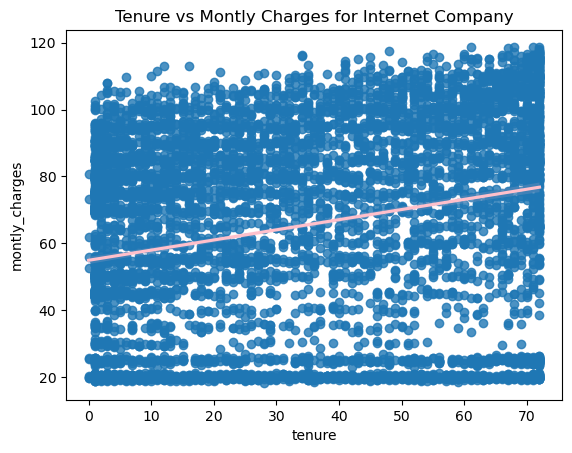

In [376]:
# plot the data:
sns.regplot(data = monthly, x= monthly.tenure, y = monthly.monthly_charges, line_kws={'color':'pink'})

plt.title("Tenure vs Montly Charges for Internet Company")
plt.xlabel('tenure')
plt.ylabel('montly_charges')
plt.show()

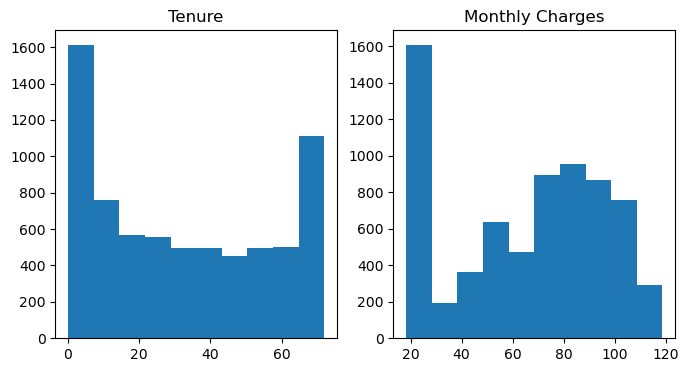

In [271]:
#test for assumptions
x = monthly.tenure
y = monthly.monthly_charges
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].hist(x)
axs[0].set_title('Tenure')

axs[1].hist(y)
axs[1].set_title('Monthly Charges')

plt.show()

In [272]:
r, p = stats.shapiro(monthly.tenure)
r, p

(0.9037512540817261, 0.0)

In [273]:
eval_dist(r, p)

The data is NOT normally distributed


In [274]:
r, p = stats.shapiro(monthly.monthly_charges)
r, p

(0.9208889007568359, 0.0)

In [275]:
eval_dist(r, p)

The data is NOT normally distributed


In [378]:
alpha = 0.05
r, p = stats.pearsonr(x,y)
print('r=', r)
print('p=', p)

r= 0.826178397950246
p= 0.0


In [379]:
#evaluate p-value
if p < alpha:
    print(f"""We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    
else:
    print(f"""We fail to reject H₀,there does not appear to be a linear relationship.
Pearson’s r: {r:2f}
P-value: {p}""")

We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of 0.826178.
P-value: 0.0


In [380]:
r, p = stats.spearmanr(x,y)
print('r=', r)
print('p=', p)

r= 0.8896957900597577
p= 0.0


In [381]:
#evaluate p-value
if p < alpha:
    print(f"""We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    
else:
    print(f"""We fail to reject H₀,there does not appear to be a linear relationship.
Pearson’s r: {r:2f}
P-value: {p}""")

We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of 0.889696.
P-value: 0.0


#### b. Does tenure correlate with total charges?

$H_0$: There is no correlation between tenure and total charges. <br>
$H_a$: There is an correlation between tenure and total charges.

In [249]:
#customers

In [295]:
total = combined[['tenure', 'total_charges']]
total

,tenure,total_charges
0,9,593.3
1,9,542.4
2,9,571.45
3,7,340.35
4,65,5957.9
...,...,...
7038,6,129.55
7039,67,1372.9
7040,46,856.5
7041,1,18.9


In [296]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 165.1+ KB


In [297]:
# need to remove nulls
cleaned = total.replace(r'\s+',np.nan, regex=True)
mask.total_charges.sort_values()

4386     100.2
2222    100.25
1771    100.35
5542     100.4
5126     100.8
         ...  
2855       NaN
3052       NaN
3118       NaN
4054       NaN
5433       NaN
Name: total_charges, Length: 7043, dtype: object

In [298]:
cleaned.fillna('0', inplace=True)
cleaned.sort_values(by = 'total_charges')

,tenure,total_charges
630,0,0
6000,0,0
1052,0,0
1366,0,0
6019,0,0
...,...,...
6791,51,997.75
6457,55,998.1
4270,13,999.45
3822,12,999.8


In [301]:
cleaned['total_charges'] = cleaned['total_charges'].astype(float)
cleaned

,tenure,total_charges
0,9,593.30
1,9,542.40
2,9,571.45
3,7,340.35
4,65,5957.90
...,...,...
7038,6,129.55
7039,67,1372.90
7040,46,856.50
7041,1,18.90


In [302]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 165.1 KB


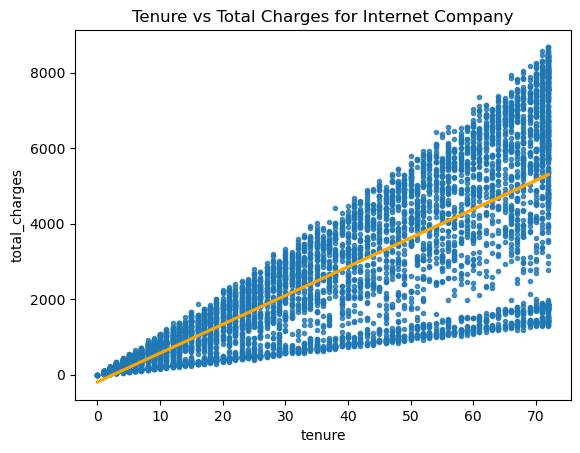

In [386]:
# plot the data:
sns.regplot(data = cleaned, x= cleaned.tenure, y = cleaned.total_charges, marker='.', line_kws=dict(color='orange'))

plt.title("Tenure vs Total Charges for Internet Company")
plt.xlabel('tenure')
plt.ylabel('total_charges')
plt.show()

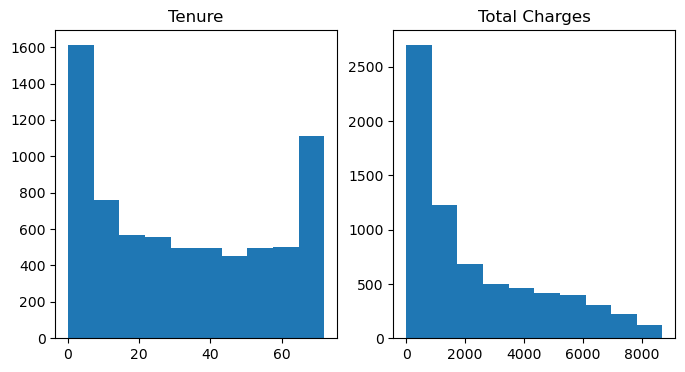

In [304]:
#test for assumptions
x = cleaned.tenure
y = cleaned.total_charges
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].hist(x)
axs[0].set_title('Tenure')

axs[1].hist(y)
axs[1].set_title('Total Charges')

plt.show()

In [305]:
r, p = stats.shapiro(cleaned.tenure)
r, p

(0.9037512540817261, 0.0)

In [306]:
eval_dist(r, p)

The data is NOT normally distributed


In [307]:
r, p = stats.shapiro(cleaned.total_charges)
r, p

(0.8601521253585815, 0.0)

In [308]:
eval_dist(r, p)

The data is NOT normally distributed


In [387]:
alpha = 0.05
r, p = stats.spearmanr(x,y)
print('r=', r)
print('p=', p)

r= 0.8896957900597577
p= 0.0


In [389]:
if p < alpha:
    print(f"""We reject H₀, there appears to be a monotonic relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    
else:
    print(f"""We fail to reject H₀,there does not appear to be a monotonic relationship.
Pearson’s r: {r:2f}
P-value: {p}""")

We reject H₀, there appears to be a monotonic relationship with a Correlation Coefficient of 0.889696.
P-value: 0.0


#### c. Does tenure correlate of monthly_cost with phone and internet service?

In [313]:
combined

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,2,Yes,2,65.60,593.3,No,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,1,No,2,59.90,542.4,No,DSL
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,Yes,Yes,Yes,1,Yes,4,69.40,571.45,No,DSL
3,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,No,No,No,1,Yes,1,48.20,340.35,No,DSL
4,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,Yes,Yes,3,Yes,2,90.45,5957.9,No,DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9970-QBCDA,Female,0,No,No,6,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,1,No,4,19.70,129.55,No,None
7039,9972-EWRJS,Female,0,Yes,Yes,67,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,3,Yes,3,19.25,1372.9,No,None
7040,9975-GPKZU,Male,0,Yes,Yes,46,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,3,No,4,19.75,856.5,No,None
7041,9975-SKRNR,Male,0,No,No,1,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,1,No,2,18.90,18.9,No,None


In [315]:
phone_and_internet = combined[['tenure','phone_service','internet_service_type', 'monthly_charges']]
phone_and_internet

,tenure,phone_service,internet_service_type,monthly_charges
0,9,Yes,DSL,65.60
1,9,Yes,DSL,59.90
2,9,Yes,DSL,69.40
3,7,Yes,DSL,48.20
4,65,Yes,DSL,90.45
...,...,...,...,...
7038,6,Yes,None,19.70
7039,67,Yes,None,19.25
7040,46,Yes,None,19.75
7041,1,Yes,None,18.90


In [316]:
phone_and_internet.phone_service.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [344]:
phone_and_internet.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [352]:
unique_values = internet_service_type['internet_service_type'].unique()
unique_values

array(['DSL', 'Fiber optic', 'None'], dtype=object)

In [362]:
phone_and_internet['phone_service'].unique()

array(['Yes', 'No'], dtype=object)

In [363]:
phone_and_internet['phone_and_internet'] = phone_and_internet['phone_and_internet'] = phone_and_internet.apply(lambda row: 'Yes' if ('DSL' in row['internet_service_type']) and (row['phone_service'] == 'Yes') else 'No', axis=1)
#np.where((phone_and_internet['phone_service'] == 'yes') & (phone_and_internet['internet_service_type'] == 'None'), 'Both Services', 'No')


In [364]:
phone_and_internet

,tenure,phone_service,internet_service_type,monthly_charges,phone_and_internet
0,9,Yes,DSL,65.60,Yes
1,9,Yes,DSL,59.90,Yes
2,9,Yes,DSL,69.40,Yes
3,7,Yes,DSL,48.20,Yes
4,65,Yes,DSL,90.45,Yes
...,...,...,...,...,...
7038,6,Yes,None,19.70,No
7039,67,Yes,None,19.25,No
7040,46,Yes,None,19.75,No
7041,1,Yes,None,18.90,No


In [370]:
phone_and_internet['p_i'] = (phone_and_internet['internet_service_type'].str.contains('DSL')) & (phone_and_internet['phone_service'] == 'Yes')
phone_and_internet

,tenure,phone_service,internet_service_type,monthly_charges,phone_and_internet,p_i
0,9,Yes,DSL,65.60,Yes,True
1,9,Yes,DSL,59.90,Yes,True
2,9,Yes,DSL,69.40,Yes,True
3,7,Yes,DSL,48.20,Yes,True
4,65,Yes,DSL,90.45,Yes,True
...,...,...,...,...,...,...
7038,6,Yes,None,19.70,No,False
7039,67,Yes,None,19.25,No,False
7040,46,Yes,None,19.75,No,False
7041,1,Yes,None,18.90,No,False


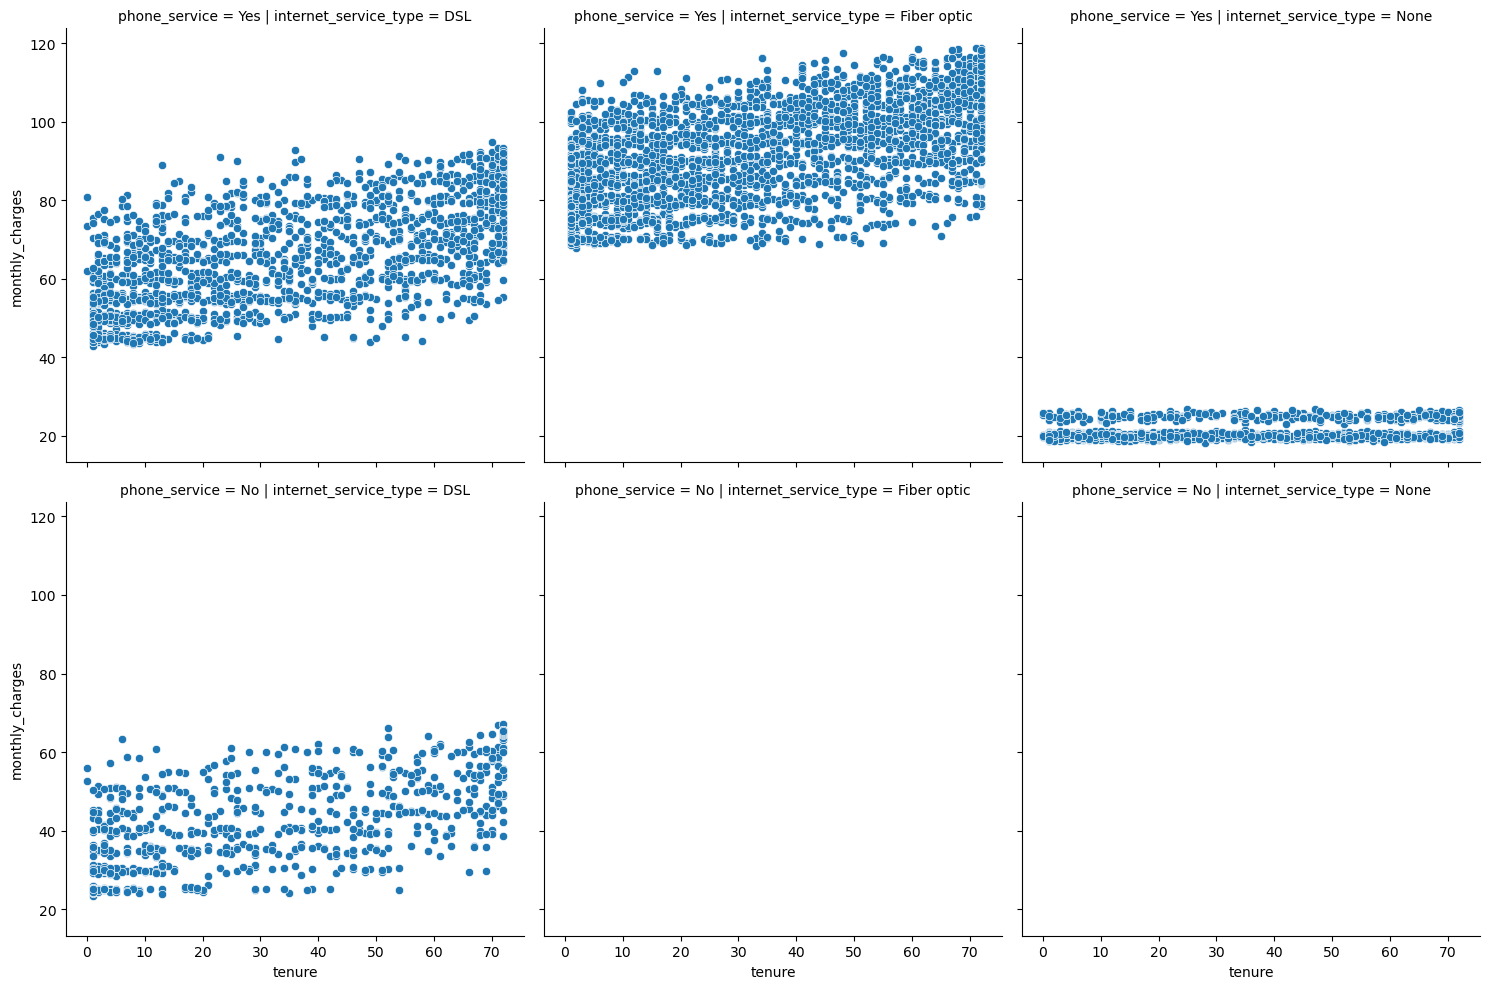

In [373]:
sns.relplot(data=phone_and_internet, x="tenure", y="monthly_charges", col="internet_service_type", row = 'phone_service')
plt.show()

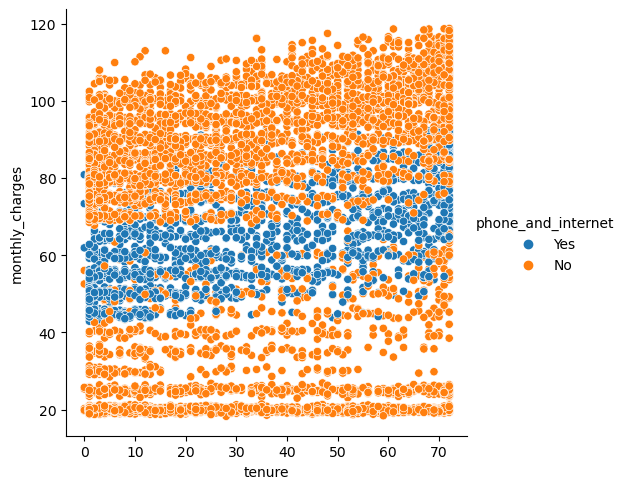

In [391]:
sns.relplot(data=phone_and_internet, x="tenure", y="monthly_charges", hue='phone_and_internet')
plt.show()

## 3. Use employees database.

a. Is there a relationship between how long an employee has been with the company and their salary?

# Comparison of Means

### Question 1: Answer with the type of test you would use (assume normal distribution):

#### a. Is there a difference in grades of students on the second floor compared to the grades of all students?

In [3]:
# One-sample mean vs Population mean:
# One-sample T-test
# 2-tailed test

#### b. Are adults who drink milk taller than adults who don't drink milk?

In [2]:
# Compare two-samples means
# Independet T-test
# 1-tailed test

#### c. Is the price of gas higher in Texas or in New Mexico?

In [ ]:
# Compare two-sample means
# 1-tailed test

#### d. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [4]:
# Anova test

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


In [5]:
# 2-tailed test
# two sample t-test scipy.stats.ttest_ind

$H_O$: Mean of average time for office one != mean of average time for office two <br>
$H_a$: Mean of average time for office one = mean of average time for office two

In [11]:
office_one_size = 40
office_one_mean = 90
office_one_std = 15

office_two_size = 50
office_two_mean = 100
office_two_std = 20


In [68]:
# need to make the dataframe with the given parmeters
one = np.random.normal(90, 15, 40)
two = stats.norm(100, 20).rvs(50)

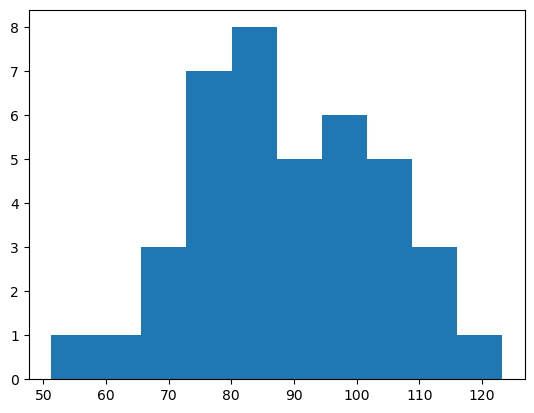

In [66]:
#plot the distributions
plt.hist(one);

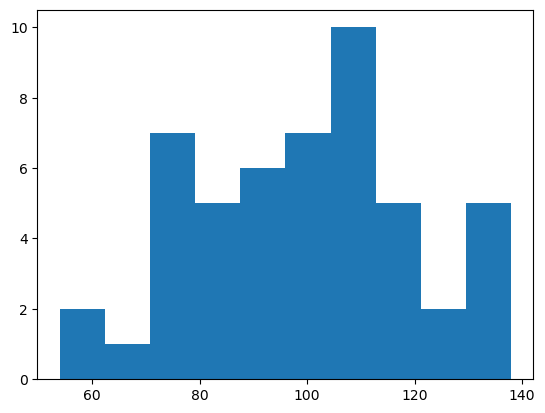

In [67]:
plt.hist(two);

In [73]:
# check the variance:
s, p = stats.levene(one, two)
p

0.0021522890604225567

In [75]:
alpha = 0.05
p < alpha

True

In [72]:
# Mini H0: variances are equal between groups
# Ha: variances are inequal between groups
# alpha: 0.05
t, p = stats.ttest_ind(one, two, equal_var=False)
t, p

(-3.4956201522281134, 0.0007641352450096037)

## Functions

In [1]:
def chi2_test(table, variables=False):
    """
    """
    chi2, p, defg, expected = stats.chi2_contingency(table)
    print(f'''Observed:
{observed5.values}

Expected:
{expected.astype(int)}
________________

ꭓ² = {chi2:.4f}
p  = {p}''')

    if variables:
        return chi2, p, defg, expected
    else:
        return

In [65]:
def eval_dist(r, p, α=0.05):
    """
    This function will take in:
    - r: the test statistic
    - p: p-value
    - α: id defaulted to 5%
    and print out if the data used to create r & p from the stats.shapiro test is normally distributed.
    """
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")